# Elección de Datasets potenciales - Desafio Clase 5

##### Deberás entregar el primer avance de tu proyecto final. Identificarás 3 datasets potenciales con las siguientes características: i) al menos 2000 filas, ii) al menos 15 columnas. Posterior a esto crearás un notebook donde cargarás los datos utilizando la librería pandas y finalmente describirás las variables que sean más interesantes teniendo en cuenta el contexto comercial y analítico del problema que se quiera resolver.

## Dataset N°1 Properati

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Se carga archivo CSV
data_properati = pd.read_csv('../ar_properties_1.csv', encoding= "UTF-8")


In [3]:
data_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              894233 non-null   float64
 6   lon              894191 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               965273 non-null   object 
 10  l4               306162 non-null   object 
 11  l5               5530 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            714179 non-null   float64
 14  bedrooms         649933 non-null   float64
 15  bathrooms        765122 non-null   float64
 16  surface_total    47

In [4]:
data_properati.head(3)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
1,9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
2,tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler


In [5]:
data_properati.shape

(1000000, 25)

In [6]:
# Se visualizan los registos unicos de provincias. Top 15
prov_cant = data_properati.l2.value_counts().head(15)
prov_cant 

Capital Federal                 265125
Bs.As. G.B.A. Zona Norte        184310
Bs.As. G.B.A. Zona Sur          131431
Santa Fe                         91565
Bs.As. G.B.A. Zona Oeste         76786
Buenos Aires Costa Atlántica     73759
Córdoba                          66274
Buenos Aires Interior            23975
Neuquén                          15487
Mendoza                           9172
Río Negro                         7935
Maldonado                         7784
Entre Ríos                        6750
Tucumán                           6531
Salta                             6056
Name: l2, dtype: int64

In [33]:
# Se visualiza el tipo de contrato y su cantidad
data_properati.price_period.value_counts()

Mensual    429842
Semanal        17
Diario         11
Name: price_period, dtype: int64

#### Limpieza de datos

In [34]:
# Se realiza una limpieza de outliers
Q1 = data_properati['surface_total'].quantile(0.25)
Q3 = data_properati['surface_total'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [28]:
data_properati_2 = data_properati[(data_properati['surface_total'] >= limite_inferior) & (data_properati['surface_total'] <= limite_superior) & (data_properati['surface_total'] >= 0)]


In [35]:
data_properati_2.shape

(421918, 25)

### Histograma de superficies

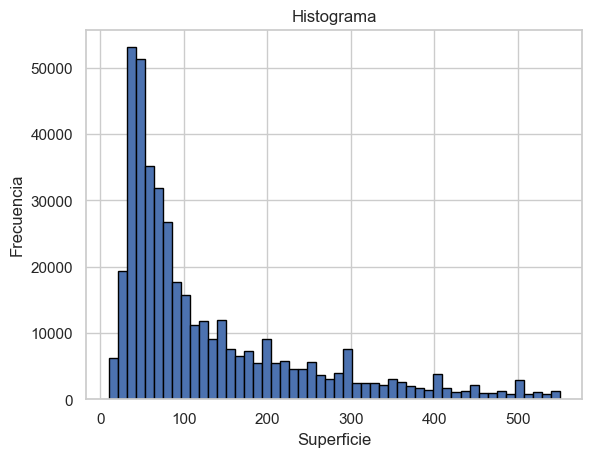

In [36]:
plt.hist(data_properati_2['surface_total'], bins=50, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Superficie')
plt.ylabel('Frecuencia')
plt.show()